#Tahap 5 – Model Evaluation

##Evaluasi Retrieval

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import os

eval_dir = '/content/drive/MyDrive/Penalaran Komputer/data/eval'
os.makedirs(eval_dir, exist_ok=True)

# Evaluasi TF-IDF + SVM
def eval_retrieval_svm(queries):
    y_true = [q['ground_truth'] for q in queries]
    y_pred = [retrieve_svm(q['query_text']) for q in queries]

    print("\n📘 Evaluasi TF-IDF + SVM:")
    for i in range(len(queries)):
        print(f"Query-{i+1}: expected={y_true[i]} | predicted={y_pred[i]}")
    for metric, val in {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }.items():
        print(f"{metric}: {val * 100:.2f}%")

    return y_pred

# Evaluasi BERT Embedding
def eval_retrieval_bert(queries):
    y_true = [q['ground_truth'] for q in queries]
    y_pred = [str(retrieve_bert(q['query_text'])[0]['case_id']) for q in queries]

    print("\n📗 Evaluasi BERT Embedding:")
    for i in range(len(queries)):
        print(f"Query-{i+1}: expected={y_true[i]} | predicted={y_pred[i]}")
    for metric, val in {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }.items():
        print(f"{metric}: {val * 100:.2f}%")

    return y_pred

# Jalankan evaluasi & simpan hasil prediksi
pred_svm = eval_retrieval_svm(test_queries)
pred_bert = eval_retrieval_bert(test_queries)

# Hitung metrik & simpan retrieval_metrics.csv
y_true = [q['ground_truth'] for q in test_queries]
metrics_df = pd.DataFrame([
    {"Model": "TF-IDF + SVM",
     "Accuracy": accuracy_score(y_true, pred_svm),
     "Precision": precision_score(y_true, pred_svm, average='macro', zero_division=0),
     "Recall": recall_score(y_true, pred_svm, average='macro', zero_division=0),
     "F1-Score": f1_score(y_true, pred_svm, average='macro', zero_division=0)},
    {"Model": "BERT Embedding",
     "Accuracy": accuracy_score(y_true, pred_bert),
     "Precision": precision_score(y_true, pred_bert, average='macro', zero_division=0),
     "Recall": recall_score(y_true, pred_bert, average='macro', zero_division=0),
     "F1-Score": f1_score(y_true, pred_bert, average='macro', zero_division=0)}
])
metrics_df.to_csv(f'{eval_dir}/retrieval_metrics.csv', index=False)

# Simpan prediction_metrics.csv
predictions = []
for i, q in enumerate(test_queries):
    predictions.append({
        "query_id": q['query_id'],
        "query_text": q['query_text'],
        "ground_truth": q['ground_truth'],
        "pred_svm": pred_svm[i],
        "pred_bert": pred_bert[i],
        "status_svm": "BENAR" if pred_svm[i] == q['ground_truth'] else "SALAH",
        "status_bert": "BENAR" if pred_bert[i] == q['ground_truth'] else "SALAH"
    })
pd.DataFrame(predictions).to_csv(f'{eval_dir}/prediction_metrics.csv', index=False)

print(f"\n✅ Output disimpan di:\n- {eval_dir}/retrieval_metrics.csv\n- {eval_dir}/prediction_metrics.csv")


📘 Evaluasi TF-IDF + SVM:
Query-1: expected=1 | predicted=1
Query-2: expected=2 | predicted=18
Query-3: expected=3 | predicted=3
Query-4: expected=4 | predicted=4
Query-5: expected=5 | predicted=5
Query-6: expected=6 | predicted=6
Query-7: expected=7 | predicted=7
Query-8: expected=8 | predicted=8
Query-9: expected=9 | predicted=8
Query-10: expected=10 | predicted=10
Accuracy: 80.00%
Precision: 68.18%
Recall: 72.73%
F1-Score: 69.70%

📗 Evaluasi BERT Embedding:
Query-1: expected=1 | predicted=1
Query-2: expected=2 | predicted=18
Query-3: expected=3 | predicted=3
Query-4: expected=4 | predicted=4
Query-5: expected=5 | predicted=5
Query-6: expected=6 | predicted=6
Query-7: expected=7 | predicted=7
Query-8: expected=8 | predicted=43
Query-9: expected=9 | predicted=9
Query-10: expected=10 | predicted=10
Accuracy: 80.00%
Precision: 66.67%
Recall: 66.67%
F1-Score: 66.67%

✅ Output disimpan di:
- /content/drive/MyDrive/Penalaran Komputer/data/eval/retrieval_metrics.csv
- /content/drive/MyDrive

##Visualisasi & Laporan

###Tabel Metrik per Model (TF-IDF + SVM vs. BERT)

In [ ]:
import pandas as pd

# Muat hasil evaluasi dari file CSV
eval_dir = '/content/drive/MyDrive/Penalaran Komputer/data/eval'
metrics_df = pd.read_csv(f'{eval_dir}/retrieval_metrics.csv')

# Format nilai ke persen
metrics_tabel = metrics_df.copy()
metrics_tabel[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = metrics_tabel[
    ['Accuracy', 'Precision', 'Recall', 'F1-Score']
].applymap(lambda x: f"{x * 100:.2f}%")

# Tampilkan tabel
from IPython.display import display, Markdown

print("📊 Tabel Metrik Evaluasi Per Model:\n")
display(metrics_tabel)

📊 Tabel Metrik Evaluasi Per Model:



/tmp/ipython-input-120-2483660044.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ].applymap(lambda x: f"{x * 100:.2f}%")


,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF + SVM,80.00%,68.18%,72.73%,69.70%
1,BERT Embedding,80.00%,66.67%,66.67%,66.67%


###Plot Bar Chart Performance

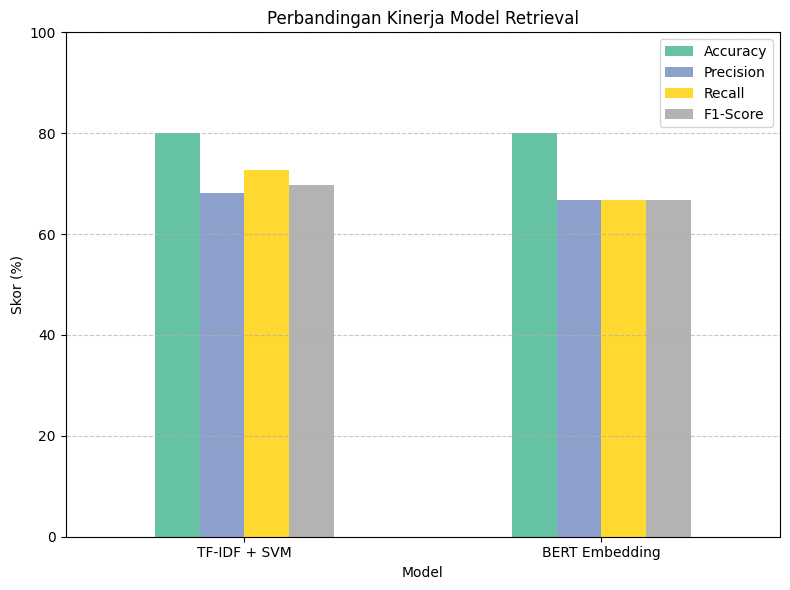

In [ ]:
import matplotlib.pyplot as plt

metrics_percent = metrics_df.copy()
metrics_percent[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100
metrics_percent.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', figsize=(8, 6), colormap='Set2')

plt.title("Perbandingan Kinerja Model Retrieval")
plt.ylabel("Skor (%)")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Diskusi Kasus Gagal Prediksi (Error Analysis)

In [ ]:
# Load file prediksi per query
pred_df = pd.read_csv(f'{eval_dir}/prediction_metrics.csv')

# Tampilkan query yang SALAH diprediksi oleh SVM
print("\n Kasus Gagal – TF-IDF + SVM:")
print(pred_df[pred_df['status_svm'] == "SALAH"][['query_id', 'ground_truth', 'pred_svm']])

# Tampilkan query yang SALAH diprediksi oleh BERT
print("\n Kasus Gagal – BERT Embedding:")
print(pred_df[pred_df['status_bert'] == "SALAH"][['query_id', 'ground_truth', 'pred_bert']])


 Kasus Gagal – TF-IDF + SVM:
   query_id  ground_truth  pred_svm
1         2             2        18
8         9             9         8

 Kasus Gagal – BERT Embedding:
   query_id  ground_truth  pred_bert
1         2             2         18
7         8             8         43
